# Summer Analytics Capstone Project by C&A Club, IIT Guwahati
## Build a machine learning model to estimate the revenue that will be generated through ads

# Problem Statement

### Let's take a case where an advertiser on the platform (DeltaX) would like to estimate the performance of their campaign in the future.
### Imagine it is the first day of March and you are given the past performance data of ads between 1st August to 28th Feb. You are now tasked to predict an ad's future performance (revenue) between March 1st and March 15th. Well, it is now time for you to put on your problem-solving hats and start playing with the data provided under the "data" section.
### Who is an advertiser?
### An advertiser is a person or company that pays for their product/event to be advertised online or offline. 

.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from IPython.display import Image
import pydotplus
import graphviz
## Above two statements are used for creating tree image for regression.
%matplotlib inline

## Data Description
### date: the date on which the ad was made live
### campaign: campaign number
### adgroup: adgroup number
### ad: ad number
### impressions - Number of time the ad was shown
### clicks - Number of time the ad clicked shown
### cost - Amount spent to show ad
### conversions - Number of transactions received
### revenue: revenue generated from the ad
### Our goal is to predict the revenue from Test data with a low RMSE score.

In [2]:
data1 = pd.read_csv('C:/Users/Admin/Desktop/IIT Project/Train_Data.csv')
data2 = pd.read_csv('C:/Users/Admin/Desktop/IIT Project/Test_Data.csv')

In [3]:
data1.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01/08/2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01/08/2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01/08/2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01/08/2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01/08/2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [4]:
data2.head()

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions
0,01-03-2021,campaign 1,adgroup 1,ad 1,0.58,121,49,1
1,01-03-2021,campaign 1,adgroup 3,ad 1,0.17,22,12,0
2,01-03-2021,campaign 1,adgroup 4,ad 1,0.05,5,3,0
3,01-03-2021,campaign 1,adgroup 2,ad 1,0.01,2,1,0
4,01-03-2021,campaign 1,adgroup 2,ad 2,0.01,3,1,0


In [5]:
data1['date'] = pd.to_datetime(data1.date)

In [6]:
data1.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,2020-01-08,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,2020-01-08,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,2020-01-08,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,2020-01-08,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,2020-01-08,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [7]:
import warnings
warnings.filterwarnings('ignore')


In [8]:
data1['date'].dt.day_name().value_counts()

Saturday     688
Sunday       671
Thursday     671
Wednesday    657
Friday       652
Monday       630
Tuesday      602
Name: date, dtype: int64

In [9]:
data1.shape

(4571, 9)

In [10]:
data2.shape

(318, 8)

## Trying New Attributes

In [11]:
data1['CPC'] = data1['cost']/data1['clicks']
data1['cost/impressions'] = data1['cost']/data1['impressions']
data1['CPCON'] = data1['cost']/data1['conversions']
data1['clicks/impressions'] = data1['clicks']/data1['impressions']

In [12]:
data2['cost/clicks'] = data2['cost']/data2['clicks']
data2['cost/impressions'] = data2['cost']/data2['impressions']
data2['cost/conversions'] = data2['cost']/data2['conversions']
data2['clicks/impressions'] = data2['clicks']/data2['impressions']

In [13]:
data1 = data1.replace(np.inf, np.nan)
data1 = data1.fillna(0)
data2 = data2.replace(np.inf, np.nan)
data2 = data2.fillna(0)

## One Hot Encoding

In [14]:
one_hot = pd.get_dummies(data1['adgroup'])
data1 = data1.drop('adgroup',axis = 1)
data1 = data1.join(one_hot)

In [15]:
one_hot = pd.get_dummies(data2['adgroup'])
data2 = data2.drop('adgroup',axis = 1)
data2 = data2.join(one_hot)

## Exploratory Data Analysis

In [16]:
data1.describe()

,impressions,clicks,cost,conversions,revenue,CPC,cost/impressions,CPCON,clicks/impressions,adgroup 1,adgroup 2,adgroup 3,adgroup 4
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,92.635747,43.340844,2.800834,1.339094,231.865340,0.059030,0.030382,0.556686,0.439934,0.287464,0.159046,0.365784,0.187705
std,198.349737,100.164913,14.361618,5.223922,1091.742763,0.135018,0.099089,2.011103,0.232061,0.452629,0.365759,0.481702,0.390519
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.000000,0.010610,0.004848,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.000000,0.015556,0.007805,0.000000,0.451389,0.000000,0.000000,0.000000,0.000000
75%,84.000000,38.000000,1.350000,1.000000,92.600000,0.055000,0.026603,0.220000,0.533333,1.000000,0.000000,1.000000,0.000000
max,3239.000000,1771.000000,531.250000,94.000000,20515.410000,3.810000,3.810000,57.450000,2.000000,1.000000,1.000000,1.000000,1.000000


### We can see there is only type of campaign, so considering campaign as a feature is useless.

In [17]:
data1["ad"].value_counts().sort_values()

ad 51      3
ad 69      4
ad 47      4
ad 36      4
ad 31      4
        ... 
ad 32    377
ad 7     461
ad 2     512
ad 1     587
ad 3     617
Name: ad, Length: 70, dtype: int64

### Upper code block shows 70 types of data in ad column

<AxesSubplot:xlabel='revenue', ylabel='cost'>

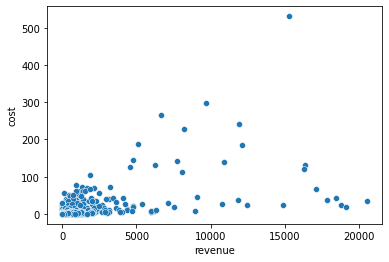

In [18]:
sns.scatterplot(x = data1["revenue"], y = data1["cost"])

<AxesSubplot:xlabel='revenue', ylabel='conversions'>

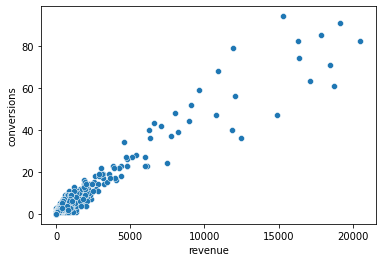

In [19]:
sns.scatterplot(x = data1["revenue"], y = data1["conversions"])

<AxesSubplot:xlabel='revenue', ylabel='impressions'>

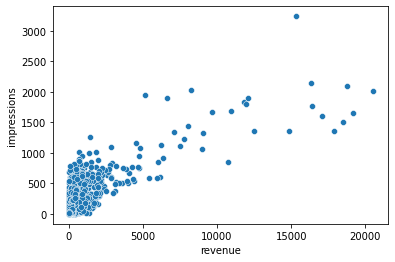

In [20]:
sns.scatterplot(x = data1["revenue"], y = data1["impressions"])

<AxesSubplot:xlabel='revenue', ylabel='clicks'>

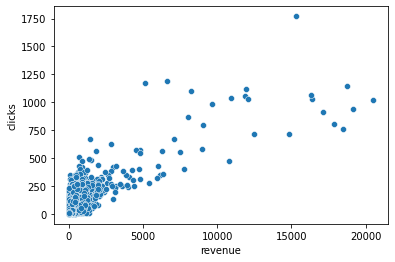

In [21]:
sns.scatterplot(x = data1["revenue"], y = data1["clicks"])

<AxesSubplot:xlabel='revenue', ylabel='CPC'>

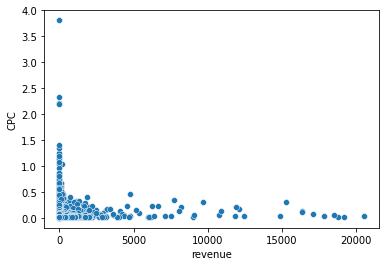

In [22]:
sns.scatterplot(x = data1["revenue"], y = data1["CPC"])

<AxesSubplot:xlabel='revenue', ylabel='CPCON'>

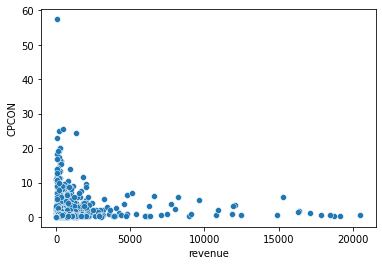

In [23]:
sns.scatterplot(x = data1["revenue"], y = data1["CPCON"])

<AxesSubplot:xlabel='revenue', ylabel='adgroup 1'>

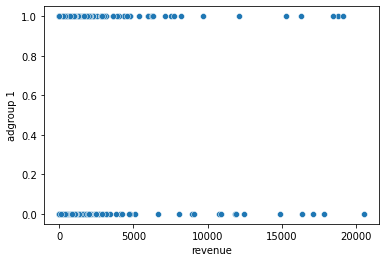

In [24]:
sns.scatterplot(x = data1["revenue"], y = data1["adgroup 1"])

<AxesSubplot:xlabel='revenue', ylabel='adgroup 2'>

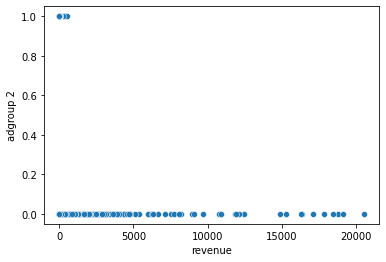

In [25]:
sns.scatterplot(x = data1["revenue"], y = data1["adgroup 2"])

<AxesSubplot:xlabel='revenue', ylabel='adgroup 3'>

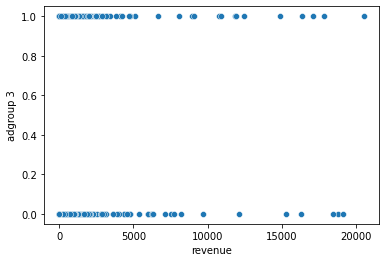

In [26]:
sns.scatterplot(x = data1["revenue"], y = data1["adgroup 3"])

<AxesSubplot:xlabel='revenue', ylabel='adgroup 4'>

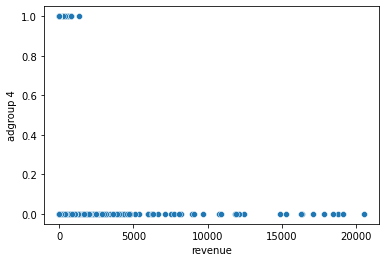

In [27]:
sns.scatterplot(x = data1["revenue"], y = data1["adgroup 4"])

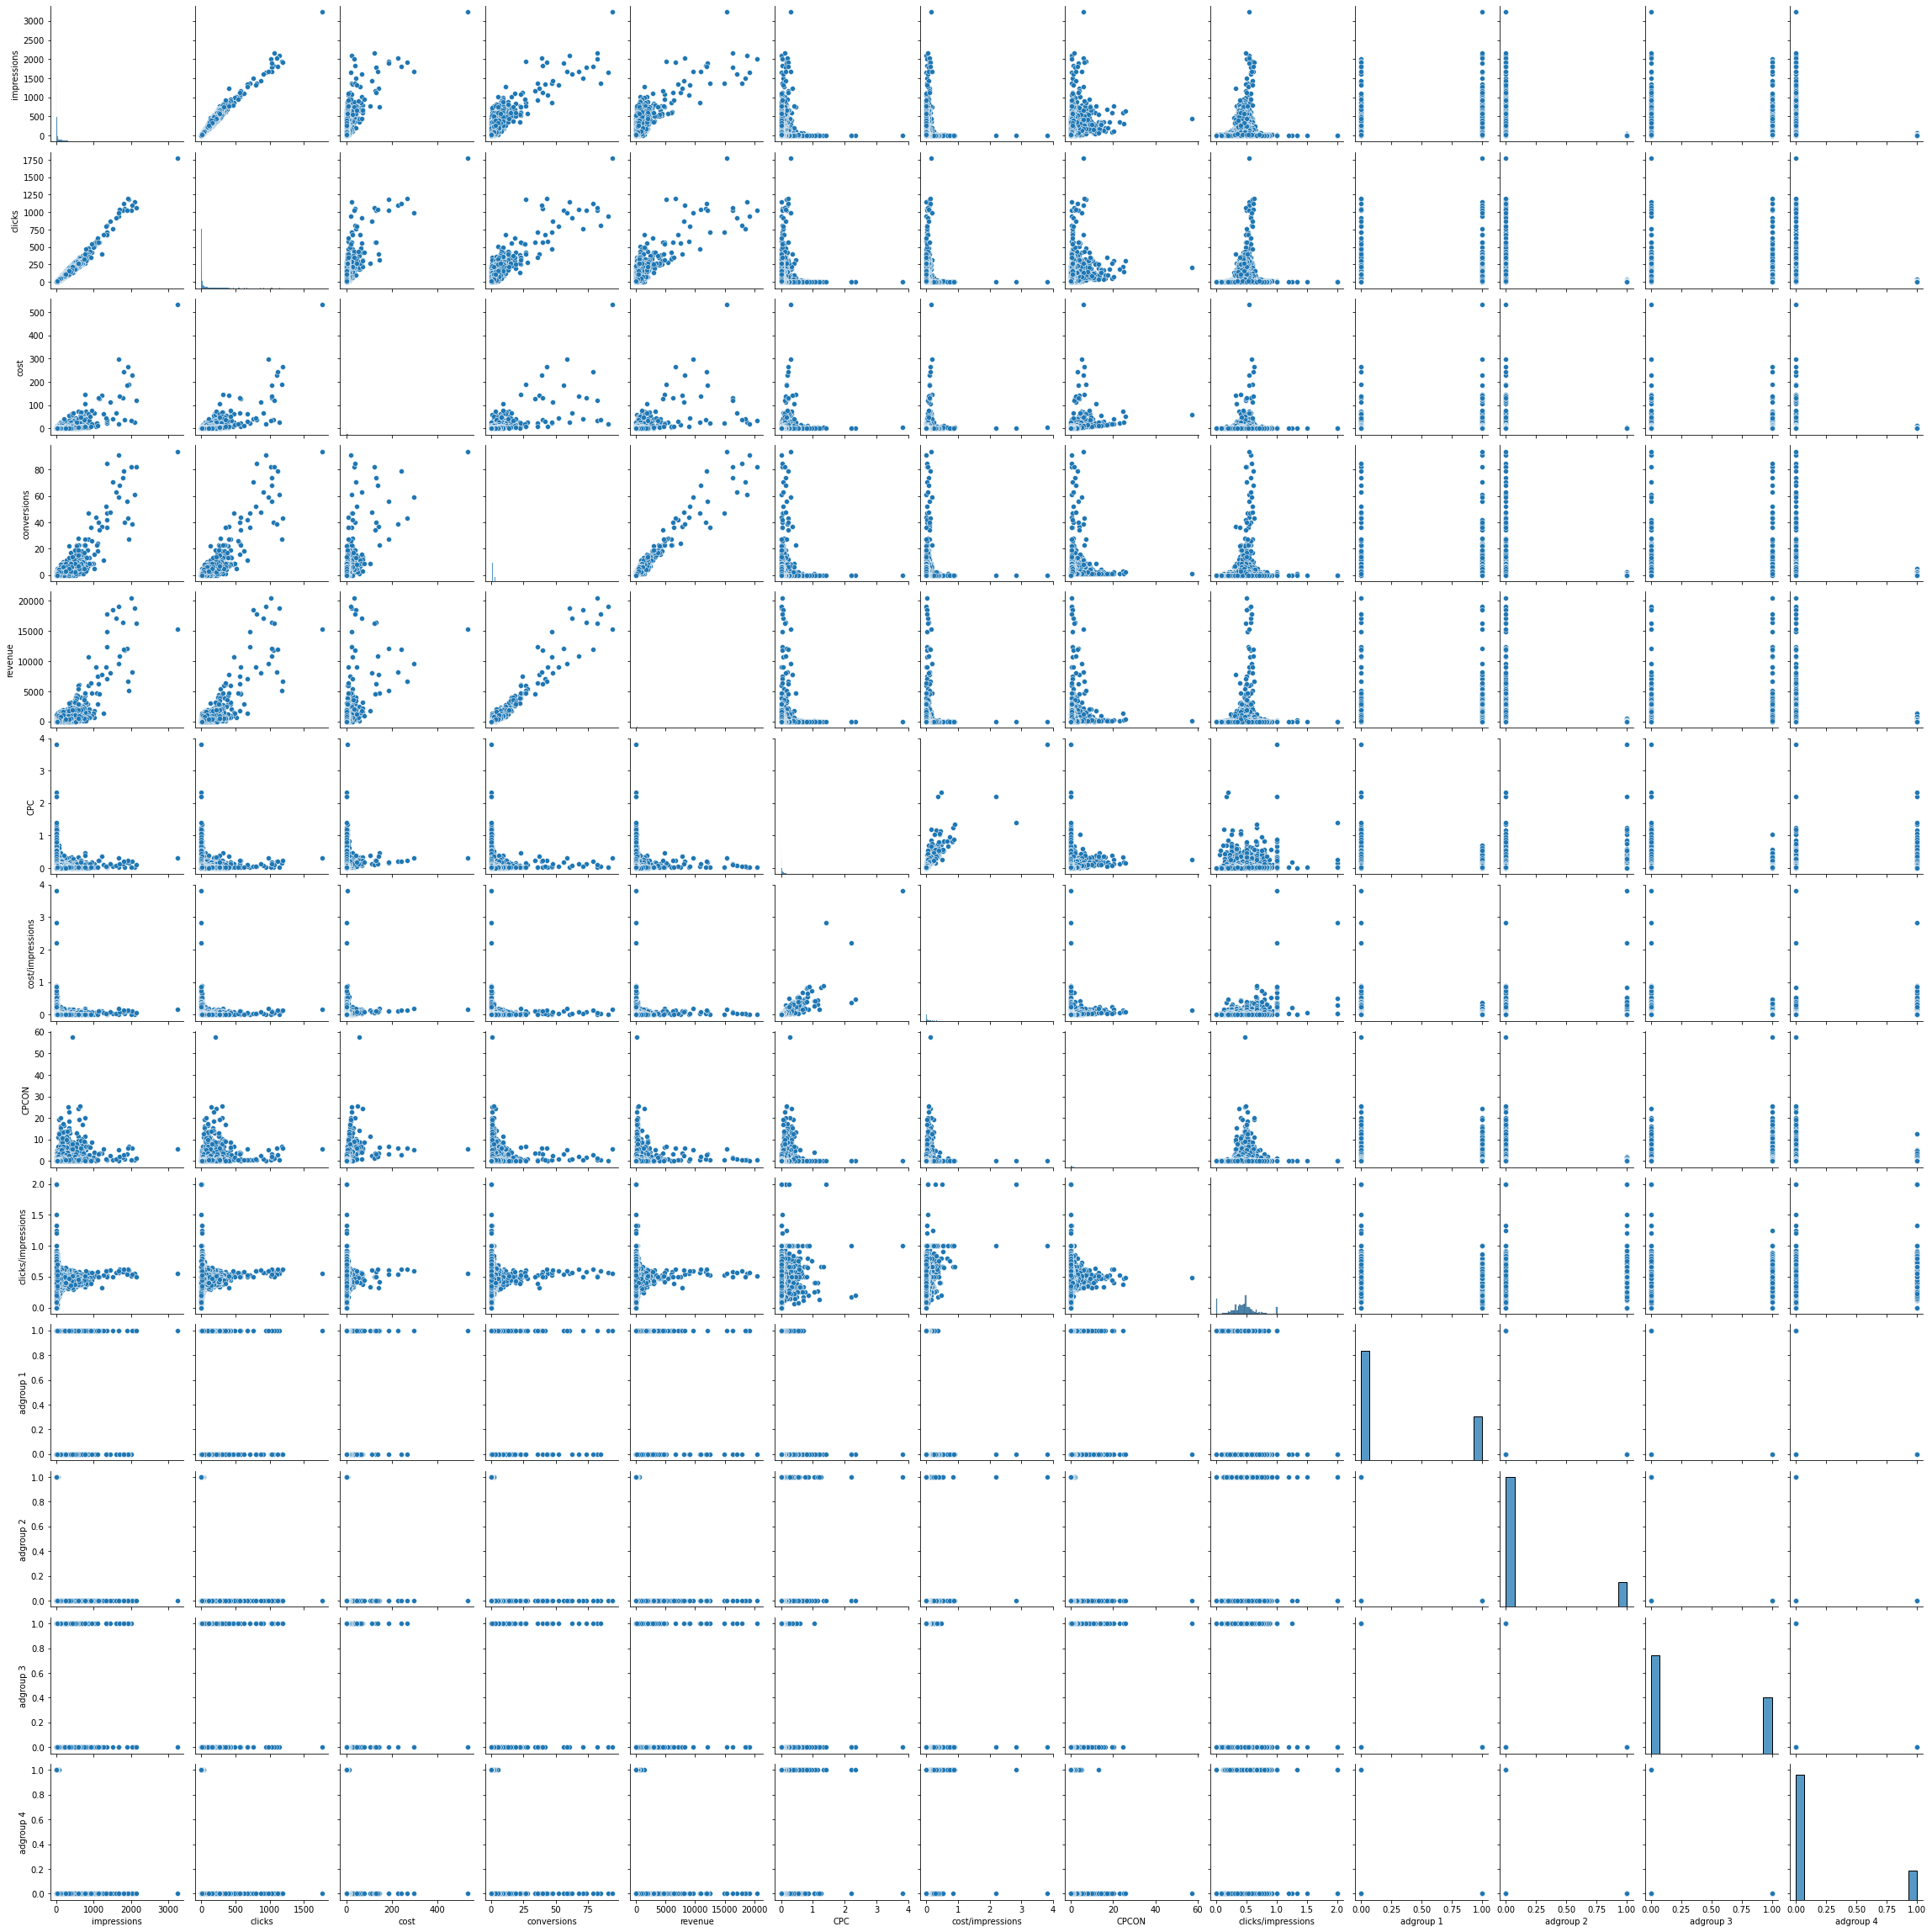

In [28]:
sns.pairplot(data1)

<AxesSubplot:title={'center':'Correlation Analysis'}>

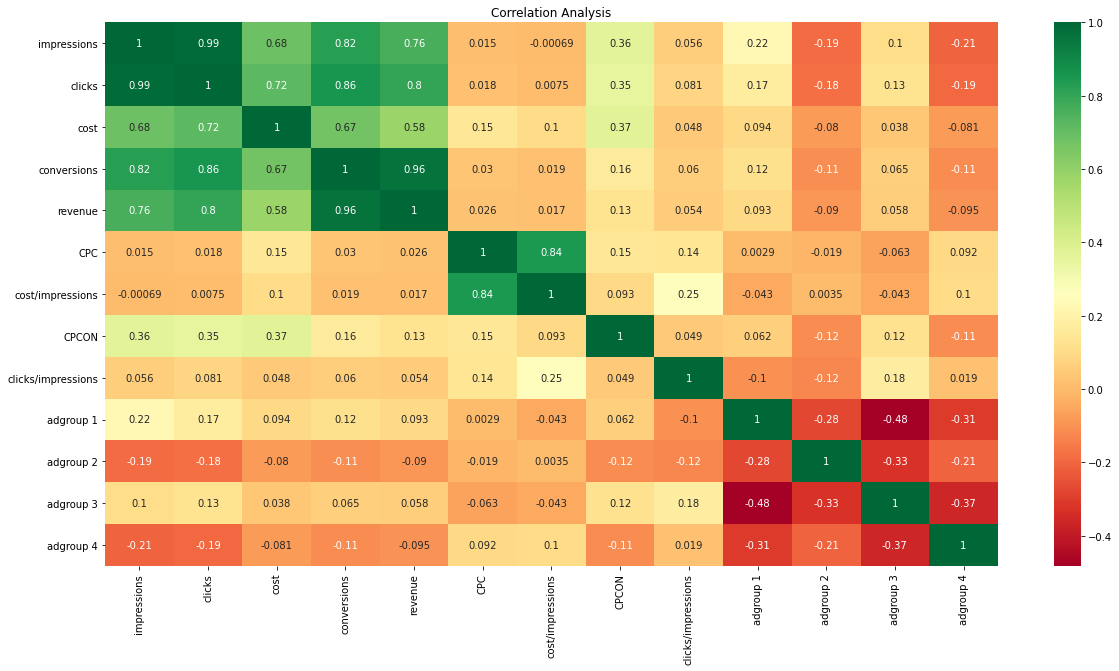

In [29]:
plt.figure(figsize=(20, 10))
plt.title("Correlation Analysis")
sns.heatmap(data1.corr(), annot = True, cmap="RdYlGn")

## Dealing with Outliers

In [30]:
data1.cost[(data1.cost > 300)] = 300
data1.impressions[(data1.impressions > 1750)] = 1750
data1.clicks[(data1.clicks > 1200)] = 1200
data1.CPC[(data1.CPC > 2)] = 2
data1.CPCON[(data1.CPCON > 25)] = 25

In [31]:
data1.describe()

,impressions,clicks,cost,conversions,revenue,CPC,cost/impressions,CPCON,clicks/impressions,adgroup 1,adgroup 2,adgroup 3,adgroup 4
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,91.885145,43.215926,2.750243,1.339094,231.865340,0.058470,0.030382,0.549452,0.439934,0.287464,0.159046,0.365784,0.187705
std,190.405932,98.349439,12.824752,5.223922,1091.742763,0.123671,0.099089,1.860182,0.232061,0.452629,0.365759,0.481702,0.390519
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.000000,0.010610,0.004848,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.000000,0.015556,0.007805,0.000000,0.451389,0.000000,0.000000,0.000000,0.000000
75%,84.000000,38.000000,1.350000,1.000000,92.600000,0.055000,0.026603,0.220000,0.533333,1.000000,0.000000,1.000000,0.000000
max,1750.000000,1200.000000,300.000000,94.000000,20515.410000,2.000000,3.810000,25.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
X_data1 = data1.drop(["date", "revenue", "campaign", "ad"], axis = 1)

In [33]:
y_data1 = data1["revenue"]

In [34]:
X_data1.head()

,impressions,clicks,cost,conversions,CPC,cost/impressions,CPCON,clicks/impressions,adgroup 1,adgroup 2,adgroup 3,adgroup 4
0,24,6,0.08,0,0.013333,0.003333,0.0000,0.250000,1,0,0,0
1,1,0,0.00,0,0.000000,0.000000,0.0000,0.000000,0,1,0,0
2,13,4,0.04,0,0.010000,0.003077,0.0000,0.307692,0,0,1,0
3,5,4,0.08,0,0.020000,0.016000,0.0000,0.800000,0,0,0,1
4,247,126,1.29,4,0.010238,0.005223,0.3225,0.510121,1,0,0,0


In [35]:
X_data2 = data2.drop(["date", "campaign", "ad"], axis = 1)

In [36]:
X_data2.head()

,cost,impressions,clicks,conversions,cost/clicks,cost/impressions,cost/conversions,clicks/impressions,adgroup 1,adgroup 2,adgroup 3,adgroup 4
0,0.58,121,49,1,0.011837,0.004793,0.58,0.404959,1,0,0,0
1,0.17,22,12,0,0.014167,0.007727,0.00,0.545455,0,0,1,0
2,0.05,5,3,0,0.016667,0.010000,0.00,0.600000,0,0,0,1
3,0.01,2,1,0,0.010000,0.005000,0.00,0.500000,0,1,0,0
4,0.01,3,1,0,0.010000,0.003333,0.00,0.333333,0,1,0,0


## Model Selection

In [37]:
#from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
model = DecisionTreeRegressor(criterion = "mse", max_depth = 6, max_features = "auto", min_samples_split = 2, splitter = "best", random_state = 0)
#model = RandomForestRegressor(n_estimators=20,random_state=42)
model.fit(X_data1,y_data1)


DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=0)

In [38]:
y_data1_pred = model.predict(X_data1)

In [39]:
y_data2_pred = model.predict(X_data2)

In [40]:
print("RMSE score for Training data: ", np.sqrt(mean_squared_error(y_data1, y_data1_pred)))

RMSE score for Training data:  136.94149752305967


### The rmse score for data1 is 136.9414, and rmse score for data2 is 155.3543 and Decision Tree Regressor given minimum rmse hence it will be best suited algorithm for our model.

In [41]:
print("R2 score for Training data: ", r2_score(y_data1, y_data1_pred))

R2 score for Training data:  0.9842629065719036


In [42]:
result = pd.DataFrame(y_data2_pred) 
result.index = X_data2.index 
result.columns = ["revenue"]
result.to_csv("Resume.csv", index = False)      

In [43]:
result.head()

,revenue
0,141.440425
1,0.000000
2,0.000000
3,0.000000
4,0.000000


 # Thank You!